# 1.14b: Black Hole Motion Analysis

**Goal:** Does the black hole (untrained tokens) move during training?

## Question

In the **lab frame** (raw W coordinates, no transformations), does the centroid of untrained tokens change position over training?

If yes → Black hole has bulk motion, need to use comoving frame for thermodynamics
If no → Black hole is stationary, can use lab frame directly

## Method

1. Compute black hole center at each timestep (centroid of untrained tokens)
2. Track position in 64D space over time
3. Compute displacement from initial position
4. Visualize motion in 1.14a style (distance vs time)

## Output

- Position trajectory of black hole centroid
- Displacement from t=0
- Velocity (if moving)
- Answer: Does it move?

## Parameters

In [1]:
# Training data to analyze
TRAINING_DATA_PATH = "../tensors/Lil_Gatsby/1.12b_training_data_sigma0e+00.safetensors"

# Corpus path (to identify untrained tokens)
CORPUS_PATH = "../data/gatsby_clean.txt"

# Visualization
PLOT_DPI = 150

## Imports

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from safetensors.torch import load_file

print("✓ Imports complete")

✓ Imports complete


## Load Training Data

In [3]:
print(f"Loading training data: {TRAINING_DATA_PATH}\n")

data = load_file(TRAINING_DATA_PATH)
embeddings = data['embeddings'].float()  # (n_steps, vocab_size, hidden_dim)

n_steps, vocab_size, hidden_dim = embeddings.shape

print(f"✓ Loaded training data")
print(f"  Shape: {embeddings.shape}")
print(f"  Steps: {n_steps:,}")
print(f"  Vocab: {vocab_size}")
print(f"  Hidden dim: {hidden_dim}")

Loading training data: ../tensors/Lil_Gatsby/1.12b_training_data_sigma0e+00.safetensors

✓ Loaded training data
  Shape: torch.Size([10001, 128, 64])
  Steps: 10,001
  Vocab: 128
  Hidden dim: 64


## Identify Untrained Tokens (Black Hole)

In [4]:
print(f"\nAnalyzing corpus: {CORPUS_PATH}\n")

# Read corpus and find which tokens appear
with open(CORPUS_PATH, 'r', encoding='ascii') as f:
    corpus_text = f.read()

corpus_bytes = corpus_text.encode('ascii')
trained_tokens = sorted(set(corpus_bytes))
untrained_tokens = sorted(set(range(vocab_size)) - set(trained_tokens))

print(f"✓ Identified token usage")
print(f"  Trained: {len(trained_tokens)} tokens")
print(f"  Untrained (black hole): {len(untrained_tokens)} tokens")

untrained_indices = torch.tensor(untrained_tokens, dtype=torch.long)


Analyzing corpus: ../data/gatsby_clean.txt

✓ Identified token usage
  Trained: 79 tokens
  Untrained (black hole): 49 tokens


## Compute Black Hole Position at Each Timestep

In [5]:
print(f"\nComputing black hole centroid trajectory (lab frame)...\n")

# Black hole center = centroid of untrained tokens
# Shape: (n_steps, hidden_dim)
bh_trajectory = embeddings[:, untrained_indices, :].mean(dim=1)

# Initial position (t=0)
bh_initial = bh_trajectory[0]

print(f"✓ Computed black hole trajectory")
print(f"  Shape: {bh_trajectory.shape}")
print(f"  Initial position norm: {torch.norm(bh_initial).item():.6f}")
print(f"  Final position norm: {torch.norm(bh_trajectory[-1]).item():.6f}")


Computing black hole centroid trajectory (lab frame)...

✓ Computed black hole trajectory
  Shape: torch.Size([10001, 64])
  Initial position norm: 0.156989
  Final position norm: 0.412496


## Compute Displacement from Initial Position

In [6]:
print(f"\nComputing displacement from t=0...\n")

# Displacement at each timestep
displacement = bh_trajectory - bh_initial.unsqueeze(0)

# Distance from initial position
distance_from_initial = torch.norm(displacement, p=2, dim=1)

print(f"✓ Computed displacement")
print(f"  Initial distance: {distance_from_initial[0].item():.6e} (should be 0)")
print(f"  Final distance: {distance_from_initial[-1].item():.6e}")
print(f"  Max distance: {distance_from_initial.max().item():.6e}")
print(f"  Mean distance: {distance_from_initial.mean().item():.6e}")


Computing displacement from t=0...

✓ Computed displacement
  Initial distance: 0.000000e+00 (should be 0)
  Final distance: 4.877225e-01
  Max distance: 4.932399e-01
  Mean distance: 4.835302e-01


## Compute Velocity (Change Per Step)

In [7]:
print(f"\nComputing velocity...\n")

# Velocity = position change per step
# velocity[t] = position[t+1] - position[t]
velocity = bh_trajectory[1:] - bh_trajectory[:-1]  # (n_steps-1, hidden_dim)
speed = torch.norm(velocity, p=2, dim=1)  # (n_steps-1,)

print(f"✓ Computed velocity")
print(f"  First step speed: {speed[0].item():.6e}")
print(f"  Final step speed: {speed[-1].item():.6e}")
print(f"  Max speed: {speed.max().item():.6e}")
print(f"  Mean speed: {speed.mean().item():.6e}")


Computing velocity...

✓ Computed velocity
  First step speed: 7.891832e-03
  Final step speed: 0.000000e+00
  Max speed: 7.891832e-03
  Mean speed: 8.094579e-05


## Plot: Black Hole Displacement vs Time


Plotting black hole motion...



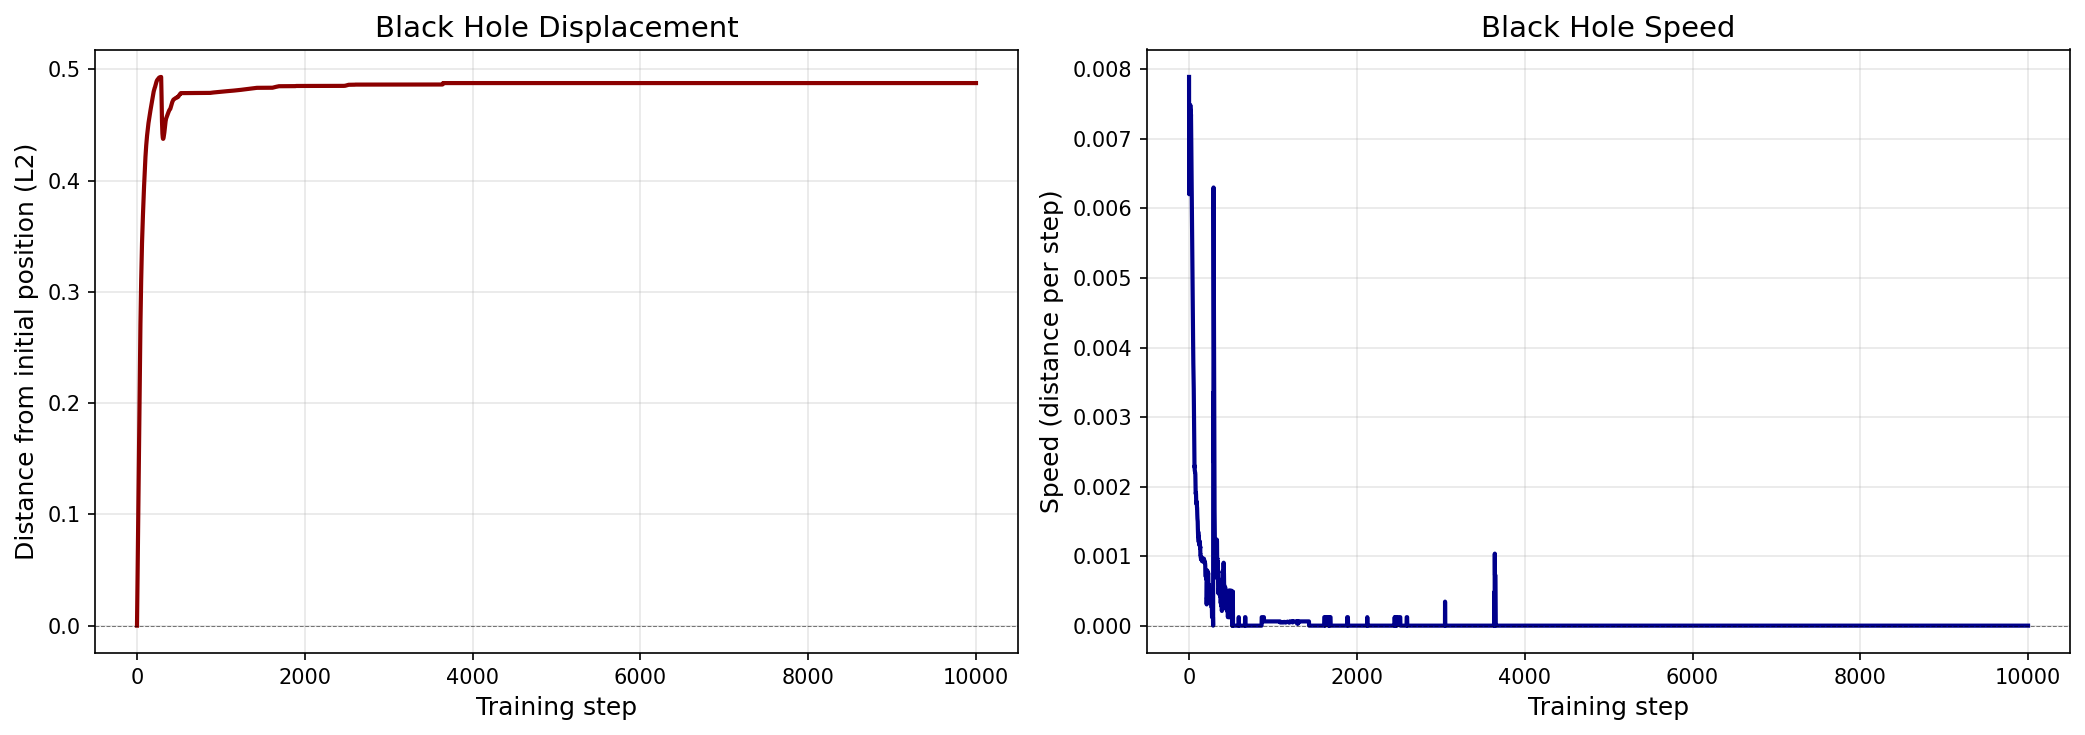

✓ Visualization complete


In [8]:
print(f"\nPlotting black hole motion...\n")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), dpi=PLOT_DPI)

steps = np.arange(n_steps)

# Left: Distance from initial position vs time
ax1.plot(steps, distance_from_initial.numpy(), linewidth=2, color='darkred')
ax1.set_xlabel('Training step', fontsize=12)
ax1.set_ylabel('Distance from initial position (L2)', fontsize=12)
ax1.set_title('Black Hole Displacement', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.5)

# Right: Speed vs time
ax2.plot(steps[:-1], speed.numpy(), linewidth=2, color='darkblue')
ax2.set_xlabel('Training step', fontsize=12)
ax2.set_ylabel('Speed (distance per step)', fontsize=12)
ax2.set_title('Black Hole Speed', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.axhline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print(f"✓ Visualization complete")

## Analysis: Does the Black Hole Move?

In [9]:
print(f"\n{'='*80}")
print(f"ANALYSIS: BLACK HOLE MOTION")
print(f"{'='*80}\n")

# Define threshold for "significant motion"
MOTION_THRESHOLD = 1e-6

max_displacement = distance_from_initial.max().item()
mean_speed = speed.mean().item()

print(f"Black hole (centroid of {len(untrained_tokens)} untrained tokens):")
print()
print(f"Displacement:")
print(f"  From initial position: {max_displacement:.6e}")
print(f"  Threshold for motion: {MOTION_THRESHOLD:.6e}")
print()
print(f"Speed:")
print(f"  Mean: {mean_speed:.6e}")
print(f"  Max: {speed.max().item():.6e}")
print()

if max_displacement < MOTION_THRESHOLD:
    print(f"✓ BLACK HOLE IS STATIONARY")
    print(f"  Maximum displacement < threshold")
    print(f"  Untrained tokens stay frozen at initialization")
    print()
    print(f"Implication for thermodynamics:")
    print(f"  → Can use lab frame (W coordinates) directly")
    print(f"  → Black hole defines natural origin")
    print(f"  → No need for comoving frame correction")
else:
    print(f"⚠️  BLACK HOLE IS MOVING")
    print(f"  Maximum displacement > threshold")
    print(f"  Untrained tokens drift together as a group")
    print()
    print(f"Implication for thermodynamics:")
    print(f"  → Must use comoving frame")
    print(f"  → Subtract bulk motion to isolate thermal motion")
    print(f"  → Temperature = thermal motion only, not drift")

print()
print(f"{'='*80}")


ANALYSIS: BLACK HOLE MOTION

Black hole (centroid of 49 untrained tokens):

Displacement:
  From initial position: 4.932399e-01
  Threshold for motion: 1.000000e-06

Speed:
  Mean: 8.094579e-05
  Max: 7.891832e-03

⚠️  BLACK HOLE IS MOVING
  Maximum displacement > threshold
  Untrained tokens drift together as a group

Implication for thermodynamics:
  → Must use comoving frame
  → Subtract bulk motion to isolate thermal motion
  → Temperature = thermal motion only, not drift



## Summary

In [10]:
print(f"\n{'='*80}")
print(f"SUMMARY")
print(f"{'='*80}\n")
print(f"Analyzed: {TRAINING_DATA_PATH}")
print(f"  Black hole: {len(untrained_tokens)} untrained tokens")
print(f"  Timesteps: {n_steps:,}")
print()
print(f"Result:")
if max_displacement < MOTION_THRESHOLD:
    print(f"  Black hole is STATIONARY (displacement < {MOTION_THRESHOLD:.0e})")
else:
    print(f"  Black hole MOVES (displacement = {max_displacement:.2e})")
print()
print(f"Next step:")
if max_displacement < MOTION_THRESHOLD:
    print(f"  → Proceed to thermodynamics in lab frame")
else:
    print(f"  → Use comoving frame for thermodynamic analysis")
print()
print(f"{'='*80}")


SUMMARY

Analyzed: ../tensors/Lil_Gatsby/1.12b_training_data_sigma0e+00.safetensors
  Black hole: 49 untrained tokens
  Timesteps: 10,001

Result:
  Black hole MOVES (displacement = 4.93e-01)

Next step:
  → Use comoving frame for thermodynamic analysis

